<a href="https://colab.research.google.com/github/Khadeeja-Moin/Colab---VGG19/blob/main/Attempt%203/Reading_Images_to_Numpy_Array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.12
albumentations                   1.4.11
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.18.0
asn1crypto                       1.5.1
astropy                          6.1.2
astropy-iers-data                0.2024.7.22.0.34.13
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                

In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image

In [3]:
import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers import MaxPooling2D

In [4]:
from keras.utils import to_categorical

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3'
test_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing3'

### Loading Training Images and Labels as Numpy Array

In [7]:
# Path to the training directory
train_dir = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3'

# Get class names (sub-directory names)
class_names = sorted(os.listdir(train_dir))

# Create a dictionary mapping class names to numeric labels
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

# Initialize lists to hold images and labels
train_images = []
train_labels = []

# Loop over each class directory
for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        # Load the image and convert it to a numpy array
        img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size as needed
        img_array = image.img_to_array(img)
        train_images.append(img_array)
        train_labels.append(class_to_idx[class_name])

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# One-hot encode your training labels
train_labels = to_categorical(train_labels, num_classes=4)

# Print the shape of the arrays
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')

Train images shape: (5712, 224, 224, 3)
Train labels shape: (5712, 4)


# Displaying a Sample Image

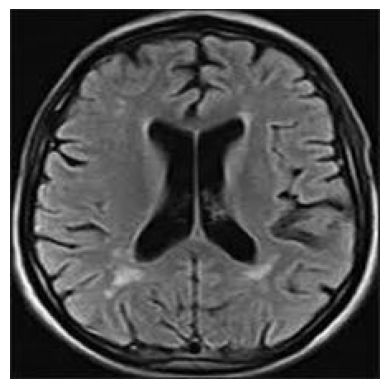

In [ ]:
# Load a grayscale image using OpenCV
img_array = cv2.imread('/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3/notumor/Tr-no_1119.jpg')

# Display the image using Matplotlib
plt.imshow(img_array)
plt.axis('off')
plt.show()

In [ ]:
print(train_labels)
print(len(train_labels))

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
5712


In [ ]:
# Find the minimum value in the array
min_value = np.min(train_images)

# Find the maximum value in the array
max_value = np.max(train_images)

# Print the range of values
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0.0
Maximum value: 255.0


In [ ]:
train_images[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

### Preprocessing of Training Images

In [ ]:
# Normalize the images
train_images = train_images / 255.0

In [ ]:
# Find the minimum value in the array
min_value = np.min(train_images)

# Find the maximum value in the array
max_value = np.max(train_images)

# Print the range of values
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0.0
Maximum value: 1.0


# Preparing Model

In [33]:
# re-size all the images to this because images in dataset are f varying sizes
IMAGE_SIZE = [224, 224]

In [34]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
# Images in our dataset are gray-scale

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# include_top = False actually drops first and last layer of model
# My first layer should be 224 * 224 (Image dimension)
# My last year will have 4 classes according to dataset

In [35]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [36]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [37]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(4,activation="softmax"))  # 4 Neurons in the Output Layer
# model.summary()

In [38]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [39]:
# fit the model
# Run the cell. It will take some time to execute
model.fit(
  train_images,
  train_labels,
  validation_split = 0.2,
  epochs=25,
  batch_size=32
)

Epoch 1/25
143/143 [==============================] - 145s 1s/step - loss: 68.0953 - accuracy: 0.7052 - val_loss: 0.1479 - val_accuracy: 0.9554
Epoch 2/25
143/143 [==============================] - 137s 962ms/step - loss: 0.2579 - accuracy: 0.9195 - val_loss: 0.8994 - val_accuracy: 0.8224
Epoch 3/25
143/143 [==============================] - 134s 939ms/step - loss: 0.1076 - accuracy: 0.9659 - val_loss: 1.0951 - val_accuracy: 0.8119
Epoch 4/25
143/143 [==============================] - 134s 935ms/step - loss: 0.0778 - accuracy: 0.9825 - val_loss: 0.4766 - val_accuracy: 0.9011
Epoch 5/25
143/143 [==============================] - 133s 931ms/step - loss: 0.0284 - accuracy: 0.9926 - val_loss: 0.6077 - val_accuracy: 0.8889
Epoch 6/25
143/143 [==============================] - 136s 950ms/step - loss: 0.0083 - accuracy: 0.9989 - val_loss: 0.8468 - val_accuracy: 0.8819
Epoch 7/25
143/143 [==============================] - 133s 931ms/step - loss: 0.0631 - accuracy: 0.9873 - val_loss: 0.2963 - v

KeyboardInterrupt: 

# Extras

In [9]:
# Loading images in form of numpy arrays

def load_images_from_folder(folder):
    images = []
    for root, dirs, files in os.walk(folder):
        for filename in files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):  # Adjust based on your image formats
                img_path = os.path.join(root, filename)
                img = Image.open(img_path) # Convert image to RGB
                img_array = np.array(img)  # Convert image to numpy array
                images.append(img_array)
    return images

train_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3'
test_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing3'

train_images = load_images_from_folder(train_path)
test_images = load_images_from_folder(test_path)

print(f'Loaded {len(train_images)} training images.')
print(f'Loaded {len(test_images)} testing images.')

Loaded 5712 training images.
Loaded 1311 testing images.


In [24]:
def load_images_and_labels_from_folder(folder):
    images = []
    labels = []
    for root, dirs, files in os.walk(folder):
        for filename in files:
            if filename.endswith(('.png', '.jpg', '.jpeg')):  # Adjust based on your image formats
                img_path = os.path.join(root, filename)
                img = Image.open(img_path)  # Convert image to RGB if necessary
                img_array = np.array(img)  # Convert image to numpy array
                images.append(img_array)

                # Get the label from the directory name
                label = os.path.basename(root)
                labels.append(label)
    return images, labels

train_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3'
test_path = '/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Testing3'

train_images, train_labels = load_images_and_labels_from_folder(train_path)
test_images, test_labels = load_images_and_labels_from_folder(test_path)

print(f'Loaded {len(train_images)} training images.')
print(f'Loaded {len(test_images)} testing images.')
print(f'Loaded {len(train_labels)} training labels.')
print(f'Loaded {len(test_labels)} testing labels.')

Loaded 5712 training images.
Loaded 1311 testing images.
Loaded 5712 training labels.
Loaded 1311 testing labels.


In [25]:
print(train_labels)

['pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary', 'pituitary'

In [28]:
for i in range(len(train_labels)): # Use range() to get numerical indices
  if train_labels[i] == 'glioma':
    train_labels[i] = 0
  elif train_labels[i] == 'meningioma':
    train_labels[i] = 1
  elif train_labels[i] == 'notumor':
    train_labels[i] = 2
  elif train_labels[i] == 'pituitary':
    train_labels[i] = 3

In [29]:
print(train_labels)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [32]:
# One-hot encode your training labels
train_labels = to_categorical(train_labels, num_classes=4)

# Print the shape of the arrays
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')

Train images shape: (5712, 224, 224, 3)
Train labels shape: (5712, 4)


In [30]:
# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [19]:
print(type(train_images))  # Should output: <class 'list'>
print(type(train_images[0]))  # Should output: <class 'numpy.ndarray'> (if there are images loaded)
print(train_images[0].shape)  # Should output the shape of the first image, e.g., (height, width, 3)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(224, 224, 3)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
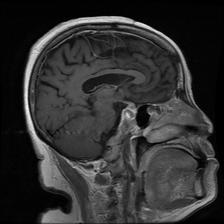

In [31]:
train_images[0]

In [ ]:
# Checking image dimension

img = Image.open("/content/drive/MyDrive/Colab Notebooks/brain_mri_dataset/Training3/notumor/Tr-no_1119.jpg")
np_img = np.array(img)
print(np_img.shape)

(224, 224, 3)
